<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/linear-regression/linear_regression_bostonhousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data: Boston Housing Dataset
# Model: Linear Regression from sklearn

**Import CSV input data from GH**

In [1]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2022-04-13 09:44:19--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2022-04-13 09:44:20--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.003s  

2022-04-13 09:44:20 (11.3 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



**Import Library**

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

**Load Boston Housing data**

In [3]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**Create X and Y variables**

In [5]:
Y = BostonHousing.medv
X = BostonHousing.drop(['medv'],axis=1)

**Review Dataset**

No handles with labels found to put in legend.


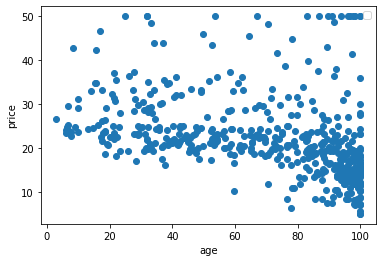

In [19]:
plt.scatter(X['age'],Y)
plt.xlabel("age")
plt.ylabel("price")

**Data Split into train and test data**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [8]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


**Linear Regression Model**

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

**Build Linear Regression Model**

In [10]:
model = linear_model.LinearRegression()

**Fit Training Data X, Y to the model**

In [11]:
model.fit(X_train,Y_train)

LinearRegression()

**Apply model to Test Data to predict Y**

In [12]:
Y_pred = model.predict(X_test)

**Prediction Results and Coefficients**

In [13]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Squared Error: %.2f" % mean_squared_error(Y_test,Y_pred))
print("Coefficient of Determination: %.2f" % r2_score(Y_test,Y_pred))

Coefficients:  [-1.02800936e-01  5.46152944e-02  3.51558542e-03  2.49435377e+00
 -1.38976543e+01  3.76845605e+00  4.03658730e-03 -1.47802416e+00
  3.14257060e-01 -1.37171889e-02 -8.62148109e-01  1.05126822e-02
 -5.65483721e-01]
Intercept:  33.44556659220435
Mean Squared Error: 20.10
Coefficient of Determination: 0.77


**Plot Predictions**

In [14]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


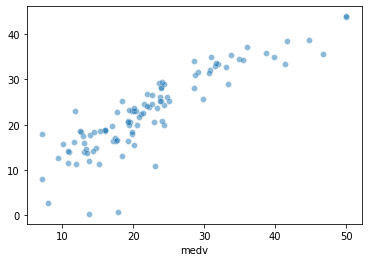

In [15]:
sb.scatterplot(Y_test,Y_pred,alpha=0.5)